Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

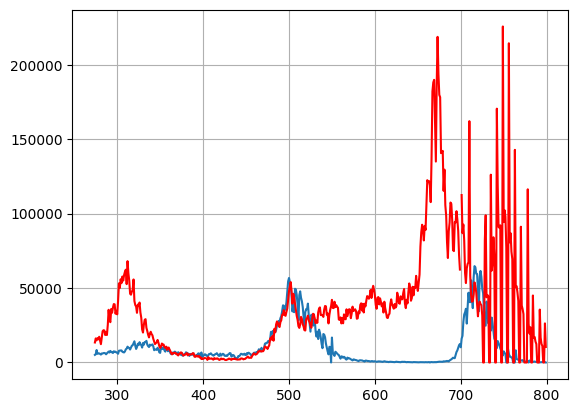

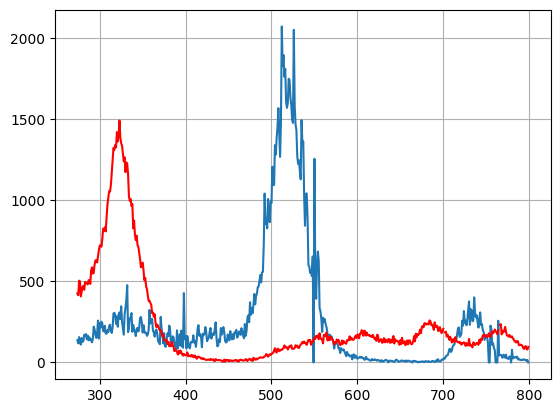

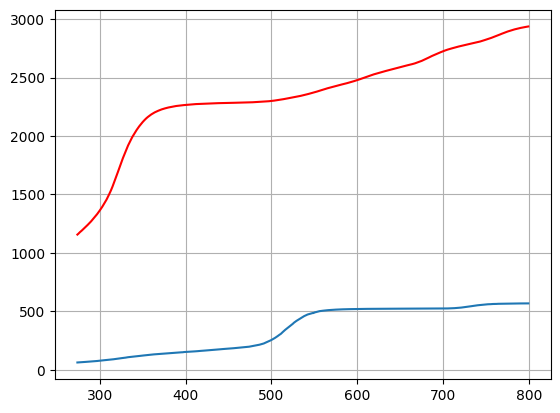

In [1]:
#Read data csv from:
#https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading data from file
df = pd.read_csv('covid.csv')

#Screening columns, data head and certain data location
print(df.columns)
#print(df.head())
#print(df.loc[30000,:])

#Selecting certain country in data columns
df1 = df.loc[df['location'] == 'Indonesia']
#df1=df1[['location','date','new_cases_smoothed_per_million','weekly_hosp_admissions_per_million','people_fully_vaccinated_per_hundred','stringency_index','reproduction_rate']]
#print(df1.tail())
df2 = df.loc[df['location'] == 'United Kingdom']
#df2=df2[['location','date','new_cases_smoothed_per_million','weekly_hosp_admissions_per_million','people_fully_vaccinated_per_hundred','stringency_index','reproduction_rate']]
#print(df2.loc[df2['date'] == '2021-03-15'])
#print(df2.tail())

#Reseting data index
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
#print(df1.tail())

#Trimming data to the same length
#print(df2)
#print(len(df2) - len(df1))
df2=df2.iloc[len(df2) - len(df1):]
df2.reset_index(drop=True, inplace=True)
#print(df2.tail())

#Setting the last XX days data, 720 = 24 months
df1=df1.iloc[len(df1)-720:800]
df2=df2.iloc[len(df2)-720:800]
#print(df1)
#print(df2)

plt.plot(df1['new_cases_smoothed_per_million'])
plt.plot(df2['new_cases_smoothed_per_million'],'r')
plt.grid()
plt.show()
plt.plot(df1['weekly_hosp_admissions_per_million'])
plt.plot(df2['weekly_hosp_admissions_per_million'],'r')
plt.grid()
plt.show()
plt.plot(df1['weekly_hosp_admissions_per_million'])
plt.plot(df2['weekly_hosp_admissions_per_million'],'r')
plt.grid()

(244, 5)
                 location  reproduction_rate  new_cases_smoothed_per_million  \
797           Afghanistan               0.96                           0.729   
1809               Africa                NaN                           3.842   
2809              Albania               0.96                          17.038   
3809              Algeria               0.74                           0.048   
4803              Andorra               0.48                         601.180   
5779               Angola               0.02                           0.000   
6747             Anguilla                NaN                         512.871   
7730  Antigua and Barbuda               0.72                          83.790   
8785            Argentina               0.09                          71.412   
9807              Armenia               0.43                           2.363   

      people_fully_vaccinated_per_hundred  weekly_hosp_admissions_per_million  
797                           

[Text(0.5, 0.92, 'COVID19'),
 Text(0.5, 0, 'new_cases_smoothed_per_million'),
 Text(0.5, 0.5, 'weekly_hosp_admissions_per_million'),
 Text(0.5, 0, 'people_fully_vaccinated_per_hundred')]

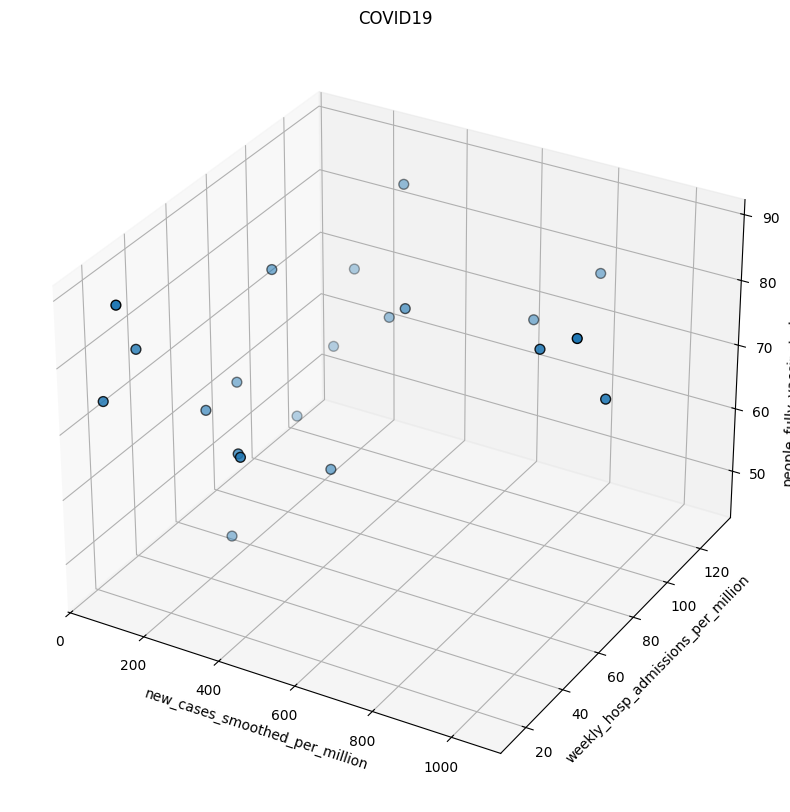

In [2]:
#Picking data from a certain date
df3=df.loc[df['date'] == '2022-05-01']

#Selecting certain parameters for clustering
df3=df3[['location','reproduction_rate', 'new_cases_smoothed_per_million', 'people_fully_vaccinated_per_hundred','weekly_hosp_admissions_per_million']]
print(df3.shape)
print(df3.head(10))

#Selecting data from Indonesia for plotting
df4=df3.loc[df['location'] == 'Indonesia']
print(df4)

#Sorting values by certain parameters
df3=df3.sort_values(by=['weekly_hosp_admissions_per_million'], ascending=False)

#deleting the first XX rows of data
#df3=df3[9:]
print(df3.head(30))

#plt.scatter(df3['new_cases'], df3['new_deaths'], marker="o", s=50, edgecolor="k", projection="3d")
#plt.grid()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df3['new_cases_smoothed_per_million'], df3['weekly_hosp_admissions_per_million'], df3['people_fully_vaccinated_per_hundred'], s=50, edgecolor="k")
ax.scatter(df4['new_cases_smoothed_per_million'], df4['weekly_hosp_admissions_per_million'], df4['people_fully_vaccinated_per_hundred'], c='r', marker="s", s=200, edgecolor="k")
plt.gca().update(dict(title='COVID19', xlabel='new_cases_smoothed_per_million', ylabel='weekly_hosp_admissions_per_million',zlabel='people_fully_vaccinated_per_hundred'))

In [3]:
#Selecting certain parameters for prediction
df4=df3[['new_cases_smoothed_per_million','weekly_hosp_admissions_per_million']]
print(df4.shape)
print(df4.head())

df4=df4.dropna()
df4.reset_index(drop=True, inplace=True)
print(df4.shape)
print(df4.head())

(244, 2)
        new_cases_smoothed_per_million  weekly_hosp_admissions_per_million
32583                           80.929                             917.510
74876                          797.097                             130.388
185491                             NaN                             125.503
62833                              NaN                             117.648
132095                         339.133                             116.257
(25, 2)
   new_cases_smoothed_per_million  weekly_hosp_admissions_per_million
0                          80.929                             917.510
1                         797.097                             130.388
2                         339.133                             116.257
3                         330.768                             116.088
4                         702.471                             112.936


0.10654837144744389
[[0.05573712]]
[52.65937727]


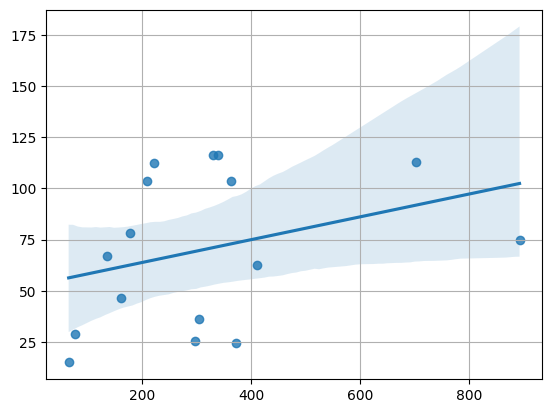

9


-0.15421966616177363

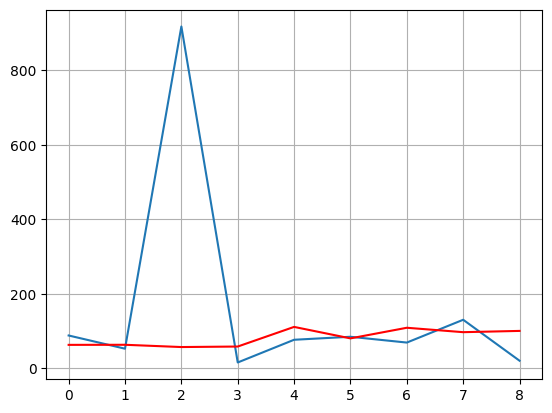

In [4]:
from sklearn.model_selection import train_test_split

x=df4[['new_cases_smoothed_per_million']].values
y=df4[['weekly_hosp_admissions_per_million']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

#Plotting Total Deaths vs Total Cases and the regression line
import seaborn as sns
#create scatterplot with regression line
sns.regplot(x=x_train, y=y_train)
plt.grid()

#Plotting y_prediction & y_test
plt.show()
plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [5]:
#Selecting certain parameters for prediction
df5=df3[['people_fully_vaccinated_per_hundred','weekly_hosp_admissions_per_million']]
print(df5.shape)
print(df5.head())

df5=df5.dropna()
df5.reset_index(drop=True, inplace=True)
print(df5.shape)
print(df5.head())

(244, 2)
        people_fully_vaccinated_per_hundred  \
32583                                   NaN   
74876                                 77.92   
185491                                76.76   
62833                                 73.94   
132095                                87.82   

        weekly_hosp_admissions_per_million  
32583                              917.510  
74876                              130.388  
185491                             125.503  
62833                              117.648  
132095                             116.257  
(25, 2)
   people_fully_vaccinated_per_hundred  weekly_hosp_admissions_per_million
0                                77.92                             130.388
1                                76.76                             125.503
2                                73.94                             117.648
3                                87.82                             116.257
4                                73.35                 

0.047762799344411855
[[0.77962147]]
[17.47240664]


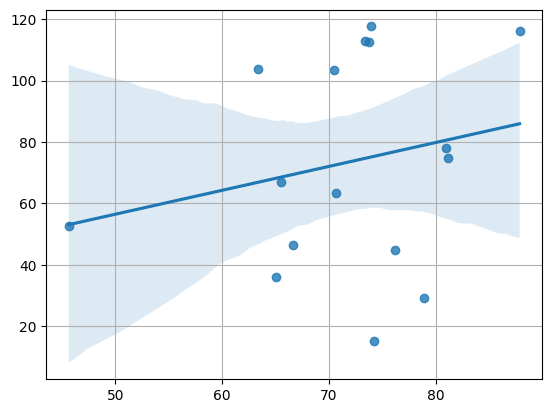

9


-0.09504347009431835

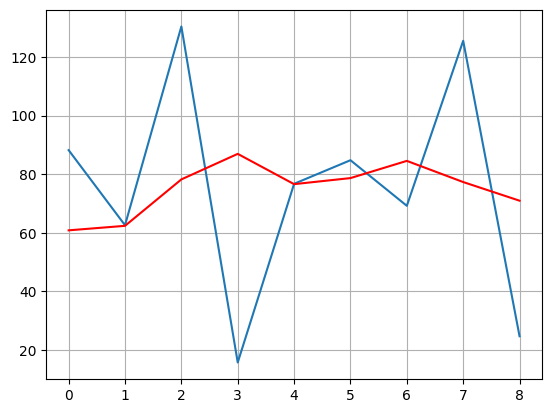

In [6]:
from sklearn.model_selection import train_test_split

x=df5[['people_fully_vaccinated_per_hundred']].values
y=df5[['weekly_hosp_admissions_per_million']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

#Plotting Total Deaths vs Total Cases and the regression line
import seaborn as sns
#create scatterplot with regression line
sns.regplot(x=x_train, y=y_train)
plt.grid()

#Plotting y_prediction & y_test
plt.show()
plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [7]:
#Selecting certain parameters for prediction
df3=df3[['reproduction_rate','people_fully_vaccinated_per_hundred','new_cases_smoothed_per_million','weekly_hosp_admissions_per_million']]
print(df3.shape)
print(df3.head())

df3=df3.dropna()
df3.reset_index(drop=True, inplace=True)
print(df3.shape)
print(df3.head())

(244, 4)
        reproduction_rate  people_fully_vaccinated_per_hundred  \
32583                0.84                                  NaN   
74876                0.72                                77.92   
185491                NaN                                76.76   
62833                 NaN                                73.94   
132095               0.68                                87.82   

        new_cases_smoothed_per_million  weekly_hosp_admissions_per_million  
32583                           80.929                             917.510  
74876                          797.097                             130.388  
185491                             NaN                             125.503  
62833                              NaN                             117.648  
132095                         339.133                             116.257  
(21, 4)
   reproduction_rate  people_fully_vaccinated_per_hundred  \
0               0.72                                77.92   
1 

0.2160833103700861
[[-5.16422221e+01 -4.72530828e-01  5.15317813e-02]]
[121.21831877]
7


-0.08261898708307447

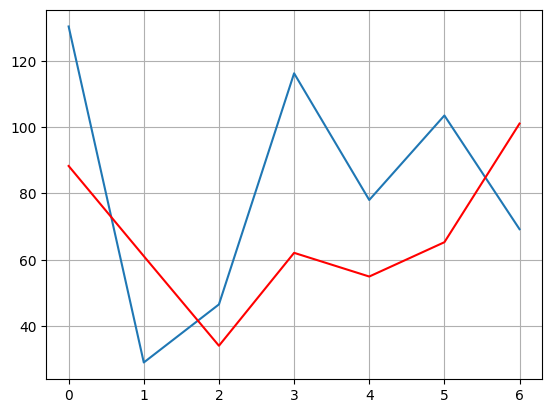

In [8]:
from sklearn.model_selection import train_test_split

x=df3[['reproduction_rate','people_fully_vaccinated_per_hundred','new_cases_smoothed_per_million']].values
y=df3[['weekly_hosp_admissions_per_million']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

#print(x[0:5])
#print(y[0:5])
#print(y_test[0:5])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred=reg.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred,'r')
plt.grid()
print(len(y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)